# LUNA experiment: grid search of regularization and diversification

In this notebook, we performed experiments on LUNA trained with 30 auxiliary functions with a grid search of regularization and diversification, and compared to results to NLM on the 1-D cubic gap dataset.

In [1]:
import time
import sys; sys.path.insert(0, "..")
import os; imagePath = os.path.abspath('..') + '/images/'
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

## Generate toy data

In [2]:
fro## Generate toy datam autograd import numpy as np
import matplotlib.pyplot as plt

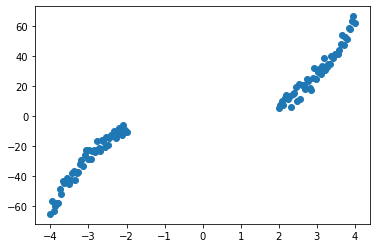

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

## Define function for training NLM and LUNA

In [4]:
def experiment_LUNA_1D(n_aux, reg_param, lambda_in, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50## Define function for training NLM and LUNA] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn,
        'auxiliary_functions': n_aux,
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param,
        'lambda_in': lambda_in,
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    luna = LUNA(architecture, random=random)
    print("")
    print(f"===== [ Aux Functions: {n_aux} ] === [ Regularization: {reg_param} ] === [ Diversification: {lambda_in} ] =====")
    print("")
    t0 = time.time()
    luna.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return luna

In [5]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

## Set hyperparameters

In [6]:
n_aux = 30
reg_grid = [0., 100., 300., 600., 1000., 3000., 6000.]
div_gr## Set hyperparametersid = [0., 10., 100., 1000., 10000.]

step_size = 1e-2
max_iteration_nlm = 5000
max_iteration_luna = 5000

## Fit with NLM and LUNA

In [7]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, step_size = step_size, max_iteration = max_iteration_nlm)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8533.09702986337; gradient mag: 19617.12712603406
Iteration 100 loss 82.3990608552723; gradient mag: 67.26477503451038
Iteration 200 loss 22.57485386813991; gradient mag: 35.01150022151346
Iteration 300 loss 11.69869208543515; gradient mag: 6.719942619854832
Iteration 400 loss 10.410683360244875; gradient mag: 5.313839683079027
Iteration 500 loss 10.26877923959405; gradient mag: 2.1686127792955032
Iteration 600 loss 10.17327979101268; gradient mag: 3.1920715622502054
Iteration 700 loss 9.686665615832682; gradient mag: 2.742679364545562
Iteration 800 loss 9.500685472958168; gradient mag: 5.284338235335301
Iteration 900 loss 9.429956858280557; gradient mag: 2.9489377428820815
Iteration 1000 loss 9.365484133847833; gradient mag: 2.0277844162259764
Iteration 1100 loss 9.316410217856795; gradient mag: 1.4505305827354478
Iteration 1200 loss 9.27539912585109; gradient mag: 9.030364408692227
Iteration 1300 loss 9.236777434845472; grad

Iteration 1300 loss 88.26976706272055; gradient mag: 9.129010323101934
Iteration 1400 loss 84.04794532812423; gradient mag: 9.108896781128797
Iteration 1500 loss 80.1286209231226; gradient mag: 21.608725406792605
Iteration 1600 loss 76.48924221733007; gradient mag: 39.52865689476413
Iteration 1700 loss 72.99215584354613; gradient mag: 29.085247202918342
Iteration 1800 loss 69.7300311133154; gradient mag: 31.574270925604754
Iteration 1900 loss 66.59583671960881; gradient mag: 10.16558289138378
Iteration 2000 loss 63.6767345736026; gradient mag: 7.60662101940201
Iteration 2100 loss 60.90971754654542; gradient mag: 17.834423966780147
Iteration 2200 loss 58.29943969284973; gradient mag: 11.035936208380805
Iteration 2300 loss 55.816954684614274; gradient mag: 7.4747169515575065
Iteration 2400 loss 53.482407975918605; gradient mag: 11.845760270899474
Iteration 2500 loss 51.68018092581391; gradient mag: 74.1843113916931
Iteration 2600 loss 49.13419752370048; gradient mag: 8.6374108772783
Iter

Iteration 2600 loss 63.85072266164951; gradient mag: 6.846333663274722
Iteration 2700 loss 61.55375882107889; gradient mag: 7.063657260592647
Iteration 2800 loss 59.53029941454653; gradient mag: 5.168083497483568
Iteration 2900 loss 57.76553670235115; gradient mag: 6.964414756070936
Iteration 3000 loss 56.225662228678424; gradient mag: 7.48323211073062
Iteration 3100 loss 54.87241891348017; gradient mag: 7.021727173722099
Iteration 3200 loss 53.714109863628565; gradient mag: 5.5950945237208085
Iteration 3300 loss 52.71276945293369; gradient mag: 4.639855642609071
Iteration 3400 loss 51.823102941721295; gradient mag: 4.712285127317424
Iteration 3500 loss 51.044347859324105; gradient mag: 4.9199865414376855
Iteration 3600 loss 50.37268456658622; gradient mag: 7.223743196256477
Iteration 3700 loss 49.73391367371277; gradient mag: 4.230672812563632
Iteration 3800 loss 49.21525786297242; gradient mag: 7.864205230397532
Iteration 3900 loss 48.755039949275485; gradient mag: 6.177610583827167


Iteration 3900 loss 170.39920565714658; gradient mag: 7.703327728056268
Iteration 4000 loss 170.3937575563383; gradient mag: 7.92068104638488
Iteration 4100 loss 170.3719724600047; gradient mag: 7.794737676283646
Iteration 4200 loss 170.40513177521268; gradient mag: 10.801357233420184
Iteration 4300 loss 170.38415540467034; gradient mag: 11.175947906767636
Iteration 4400 loss 170.35315013954192; gradient mag: 10.801040723390312
Iteration 4500 loss 170.33966773198253; gradient mag: 8.218032883320031
Iteration 4600 loss 170.33178803043631; gradient mag: 9.893663337005664
Iteration 4700 loss 170.31586665838338; gradient mag: 9.76384798787247
Iteration 4800 loss 170.30873755854032; gradient mag: 9.882139302457775
Iteration 4900 loss 170.2953014238896; gradient mag: 9.539135969007097

Training took 0:04:05 (h:mm:ss)


In [8]:
luna_list = []
for div in div_grid:
    for reg in reg_grid:
        luna = experiment_LUNA_1D(n_aux, reg, div, step_size = step_size, max_iteration = max_iteration_luna)
        luna_list.append(luna)
        


===== [ Aux Functions: 30 ] === [ Regularization: 0.0 ] === [ Diversification: 0.0 ] =====

Iteration 0 loss 13024.10362907591; gradient mag: 7360.94524079221
Iteration 100 loss 107.14659673235158; gradient mag: 26.49535652516556
Iteration 200 loss 50.31221804445474; gradient mag: 16.95827147379247
Iteration 300 loss 23.482346664379584; gradient mag: 8.805216526641102
Iteration 400 loss 16.189459486870316; gradient mag: 4.562444925572688
Iteration 500 loss 14.276714864654336; gradient mag: 2.758099820489945
Iteration 600 loss 13.484450068200932; gradient mag: 1.849768015513704
Iteration 700 loss 12.809358660093848; gradient mag: 1.765663733778246
Iteration 800 loss 12.298719740851617; gradient mag: 1.3463901499338948
Iteration 900 loss 11.85675778331644; gradient mag: 1.389201929987386
Iteration 1000 loss 11.474565747981423; gradient mag: 2.1302889953026325
Iteration 1100 loss 11.152588955358517; gradient mag: 1.0177440617004223
Iteration 1200 loss 10.84441454539577; gradient mag: 4.1

Iteration 1100 loss 104.14656466068223; gradient mag: 5.054830080481078
Iteration 1200 loss 98.07962988461261; gradient mag: 5.223916716440412
Iteration 1300 loss 92.55080974994569; gradient mag: 5.14176650563911
Iteration 1400 loss 87.46738714381937; gradient mag: 5.266339296978828
Iteration 1500 loss 82.74880572400768; gradient mag: 4.074119205881533
Iteration 1600 loss 78.51122106033472; gradient mag: 5.435580915744617
Iteration 1700 loss 74.62247987700997; gradient mag: 4.879761841870446
Iteration 1800 loss 71.05726911579862; gradient mag: 4.06800572220062
Iteration 1900 loss 67.8127876181221; gradient mag: 5.627489787756761
Iteration 2000 loss 64.81793881561342; gradient mag: 3.23088989047848
Iteration 2100 loss 62.0903486980495; gradient mag: 3.4295126942595116
Iteration 2200 loss 59.58945475969644; gradient mag: 3.3599165295289994
Iteration 2300 loss 57.31016292305928; gradient mag: 4.155755728211566
Iteration 2400 loss 55.213550613229344; gradient mag: 4.533590885636415
Iterati

Iteration 2300 loss 93.19395915781926; gradient mag: 3.8030733761485194
Iteration 2400 loss 91.26958771586247; gradient mag: 3.782769425280102
Iteration 2500 loss 89.59698998250559; gradient mag: 3.330535415242249
Iteration 2600 loss 88.1756907425821; gradient mag: 4.868336784972247
Iteration 2700 loss 86.93767446346038; gradient mag: 2.854094044130426
Iteration 2800 loss 85.86401787306777; gradient mag: 2.7144934890874097
Iteration 2900 loss 84.93388067674204; gradient mag: 2.963800083058664
Iteration 3000 loss 84.11202710728325; gradient mag: 3.507768124279388
Iteration 3100 loss 83.37475153766967; gradient mag: 2.3988094818616976
Iteration 3200 loss 82.71507111285007; gradient mag: 3.2571848071078375
Iteration 3300 loss 82.09110688826651; gradient mag: 2.635732322368186
Iteration 3400 loss 81.46576885562217; gradient mag: 4.749648061802666
Iteration 3500 loss 80.85939118349239; gradient mag: 2.9813587809643036
Iteration 3600 loss 80.24659651161735; gradient mag: 1.8961043680905612
I

Iteration 3400 loss 245.64418827713672; gradient mag: 3.454555328798502
Iteration 3500 loss 245.64637038466432; gradient mag: 3.4654518711533497
Iteration 3600 loss 245.65099999168456; gradient mag: 8.63473372724816
Iteration 3700 loss 245.65077887340385; gradient mag: 3.5171769130933197
Iteration 3800 loss 245.64471854116977; gradient mag: 3.4637464910664186
Iteration 3900 loss 245.66368319034478; gradient mag: 3.4658318398065715
Iteration 4000 loss 245.65345114284736; gradient mag: 3.511486549065892
Iteration 4100 loss 245.6533255444134; gradient mag: 3.5101343737401676
Iteration 4200 loss 245.67238665394075; gradient mag: 0.3729858074695498
Iteration 4300 loss 245.6493781507964; gradient mag: 0.08239413123628304
Iteration 4400 loss 245.64839552999317; gradient mag: 0.03330499786634564
Iteration 4500 loss 245.649247069528; gradient mag: 0.07794468909548544
Iteration 4600 loss 245.65561395691125; gradient mag: 0.20619734756277092
Iteration 4700 loss 245.64826366615048; gradient mag: 0

Iteration 4500 loss 33.36458379150798; gradient mag: 4.284386736910231
Iteration 4600 loss 33.065540141590255; gradient mag: 5.319539122581564
Iteration 4700 loss 32.80749631944075; gradient mag: 14.263813534790524
Iteration 4800 loss 32.426666145218775; gradient mag: 1.419550335671274
Iteration 4900 loss 32.18980603156018; gradient mag: 10.176457635375469

Training took 0:08:08 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 300.0 ] === [ Diversification: 10.0 ] =====

Iteration 0 loss 13333.12966468414; gradient mag: 7363.666904946818
Iteration 100 loss 317.8522888059465; gradient mag: 29.924704930211096
Iteration 200 loss 236.6307682097817; gradient mag: 15.517845550419855
Iteration 300 loss 200.0403744207676; gradient mag: 11.065448423904224
Iteration 400 loss 180.7980593511822; gradient mag: 28.615595936990914
Iteration 500 loss 167.3367091594298; gradient mag: 6.765541666872895
Iteration 600 loss 155.96102504330742; gradient mag: 16.226059645130494
Iteration 700 loss

Iteration 500 loss 335.9998170870264; gradient mag: 17.100289325945244
Iteration 600 loss 295.31286582550473; gradient mag: 15.350545674876981
Iteration 700 loss 262.07763290315364; gradient mag: 13.800182186743966
Iteration 800 loss 234.757427906408; gradient mag: 12.6376541459155
Iteration 900 loss 212.054676500823; gradient mag: 12.25796317517216
Iteration 1000 loss 192.98749951125737; gradient mag: 10.277314493764136
Iteration 1100 loss 177.35432384729367; gradient mag: 9.65655733351843
Iteration 1200 loss 164.15591180668665; gradient mag: 8.797526953986655
Iteration 1300 loss 153.15400484946076; gradient mag: 8.04860000968065
Iteration 1400 loss 143.8505276536184; gradient mag: 7.7462166225082445
Iteration 1500 loss 135.9723467938527; gradient mag: 7.141079994314277
Iteration 1600 loss 129.31397523921206; gradient mag: 6.6433018212015975
Iteration 1700 loss 123.65262530838878; gradient mag: 6.163278647593248
Iteration 1800 loss 118.83411957893482; gradient mag: 5.529514175357155
I

Iteration 1700 loss 259.4354706116289; gradient mag: 20.4334318532892
Iteration 1800 loss 258.2419671751223; gradient mag: 14.83665010462506
Iteration 1900 loss 257.47770946804883; gradient mag: 23.493734055544074
Iteration 2000 loss 256.9716414970437; gradient mag: 11.395944280818027
Iteration 2100 loss 256.48638741993693; gradient mag: 8.973714781742787
Iteration 2200 loss 256.1786444874152; gradient mag: 12.052324426732088
Iteration 2300 loss 256.096451405429; gradient mag: 6.664328105181208
Iteration 2400 loss 255.87660845833625; gradient mag: 11.404443184408047
Iteration 2500 loss 255.8506528155594; gradient mag: 12.398043395502677
Iteration 2600 loss 255.8083774001642; gradient mag: 2.4051775589992657
Iteration 2700 loss 255.6961330170282; gradient mag: 4.7320512950101765
Iteration 2800 loss 255.67631066572082; gradient mag: 2.4324422240668233
Iteration 2900 loss 255.65803696305883; gradient mag: 3.2029272469696792
Iteration 3000 loss 255.65404941559225; gradient mag: 4.186292685

Iteration 2800 loss 143.23523843878837; gradient mag: 17.09007853129889
Iteration 2900 loss 143.08502846022873; gradient mag: 9.22999551504942
Iteration 3000 loss 141.74030238096807; gradient mag: 20.918528220189316
Iteration 3100 loss 140.41388552694508; gradient mag: 19.18449636712487
Iteration 3200 loss 139.9143398793288; gradient mag: 6.347036670501043
Iteration 3300 loss 139.0465612373979; gradient mag: 21.709272255512914
Iteration 3400 loss 142.74709887864952; gradient mag: 5.594978991904668
Iteration 3500 loss 138.68252598817574; gradient mag: 8.113521125547955
Iteration 3600 loss 137.62955489887838; gradient mag: 15.85130359588518
Iteration 3700 loss 137.0379481616505; gradient mag: 9.106144245306428
Iteration 3800 loss 135.6806853460908; gradient mag: 17.423199077980616
Iteration 3900 loss 135.4739844196239; gradient mag: 31.72220417449356
Iteration 4000 loss 134.7887006029075; gradient mag: 6.165906714955421
Iteration 4100 loss 133.67930196876222; gradient mag: 8.053269655587

Iteration 3900 loss 176.0049582260898; gradient mag: 13.801680949692193
Iteration 4000 loss 175.5902488303828; gradient mag: 9.745907468873037
Iteration 4100 loss 175.36253933140807; gradient mag: 21.200182386985162
Iteration 4200 loss 175.1236878415355; gradient mag: 14.731770221628052
Iteration 4300 loss 174.83313766132483; gradient mag: 7.777230662693178
Iteration 4400 loss 174.81420498122384; gradient mag: 19.483401067836553
Iteration 4500 loss 174.5033435475934; gradient mag: 16.17368091739457
Iteration 4600 loss 174.20012972183642; gradient mag: 24.495567691233262
Iteration 4700 loss 174.0653761031722; gradient mag: 28.826416639524986
Iteration 4800 loss 173.8299644066304; gradient mag: 4.179810547939182
Iteration 4900 loss 173.76755930925515; gradient mag: 16.78074408532204

Training took 0:08:00 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 1000.0 ] === [ Diversification: 100.0 ] =====

Iteration 0 loss 14116.008259580887; gradient mag: 7376.93867034219
Iteration


Training took 0:08:11 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 6000.0 ] === [ Diversification: 100.0 ] =====

Iteration 0 loss 19112.34366109487; gradient mag: 7401.456704299974
Iteration 100 loss 3025.415272961921; gradient mag: 132.14973123864084
Iteration 200 loss 1754.9112040693144; gradient mag: 91.60456149526809
Iteration 300 loss 1178.868701004003; gradient mag: 93.37592847159233
Iteration 400 loss 879.7103541479128; gradient mag: 53.886936107076174
Iteration 500 loss 711.548343283052; gradient mag: 44.929516137907655
Iteration 600 loss 610.8738092830406; gradient mag: 37.3183395215265
Iteration 700 loss 549.4264574128272; gradient mag: 30.327056195227033
Iteration 800 loss 510.53046001417266; gradient mag: 23.35188847019256
Iteration 900 loss 485.3289458345992; gradient mag: 21.343837465398693
Iteration 1000 loss 468.78074730565254; gradient mag: 16.411877822010844
Iteration 1100 loss 458.15587733311344; gradient mag: 17.103000496809305
Iteration 1200 loss 

Iteration 1000 loss 701.0824264638185; gradient mag: 394.35547867986276
Iteration 1100 loss 700.4797390294623; gradient mag: 216.65787528029782
Iteration 1200 loss 698.4848856421063; gradient mag: 574.2486423121766
Iteration 1300 loss 695.098931882065; gradient mag: 207.44084078503198
Iteration 1400 loss 693.5534417973923; gradient mag: 318.00067056005287
Iteration 1500 loss 692.5060346694939; gradient mag: 488.39453801875504
Iteration 1600 loss 689.605615178632; gradient mag: 90.62733537804036
Iteration 1700 loss 688.6711819356168; gradient mag: 434.7988996044891
Iteration 1800 loss 688.2582312021616; gradient mag: 439.89376225163016
Iteration 1900 loss 685.6030023068126; gradient mag: 408.18813796968567
Iteration 2000 loss 684.5639740625745; gradient mag: 424.9775149961211
Iteration 2100 loss 683.3486924022345; gradient mag: 325.6357272015052
Iteration 2200 loss 681.8157206305461; gradient mag: 365.82924575793913
Iteration 2300 loss 681.0360560955457; gradient mag: 401.227703110596
I

Iteration 2200 loss 714.7733543506912; gradient mag: 68.11220372706586
Iteration 2300 loss 711.1903418557454; gradient mag: 145.53142528733449
Iteration 2400 loss 709.2310099528535; gradient mag: 380.1749056384021
Iteration 2500 loss 704.8355933641553; gradient mag: 108.69103509339415
Iteration 2600 loss 702.3104877921735; gradient mag: 223.6903761491533
Iteration 2700 loss 699.731127928547; gradient mag: 156.51023378205815
Iteration 2800 loss 697.9284853290563; gradient mag: 273.4327652245884
Iteration 2900 loss 695.6193153245449; gradient mag: 223.40005956914698
Iteration 3000 loss 696.7682516885425; gradient mag: 491.81667714305627
Iteration 3100 loss 691.9704359859181; gradient mag: 174.87013533577553
Iteration 3200 loss 690.3015338939954; gradient mag: 131.86383941961884
Iteration 3300 loss 690.9910655440873; gradient mag: 430.21452478531836
Iteration 3400 loss 691.1425809368566; gradient mag: 553.792204168892
Iteration 3500 loss 687.4028190128693; gradient mag: 242.25813117112995

Iteration 3400 loss 808.1231770787936; gradient mag: 109.27246161547814
Iteration 3500 loss 805.9996668551998; gradient mag: 203.0216854701824
Iteration 3600 loss 805.239887128606; gradient mag: 90.06143586864808
Iteration 3700 loss 808.702866416131; gradient mag: 202.12197707325566
Iteration 3800 loss 805.8933859070416; gradient mag: 227.21492880192915
Iteration 3900 loss 805.2287782008248; gradient mag: 217.88026683119276
Iteration 4000 loss 806.5195444284827; gradient mag: 476.61219869302056
Iteration 4100 loss 804.4035597781466; gradient mag: 129.14934715120336
Iteration 4200 loss 803.3629033953724; gradient mag: 188.5706357323726
Iteration 4300 loss 806.1469640590051; gradient mag: 350.8587045901218
Iteration 4400 loss 804.1704050755382; gradient mag: 236.18987581319718
Iteration 4500 loss 802.9804946426996; gradient mag: 153.29044095017662
Iteration 4600 loss 802.0668619155267; gradient mag: 196.8035436351509
Iteration 4700 loss 804.7655958332174; gradient mag: 65.84611088300316


Iteration 4600 loss 4987.904684843873; gradient mag: 3017.6603223101465
Iteration 4700 loss 4992.232888537678; gradient mag: 3821.6985966921757
Iteration 4800 loss 4983.410341527637; gradient mag: 1968.9804079619105
Iteration 4900 loss 4993.6972655387235; gradient mag: 4201.484408137052

Training took 0:08:32 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 100.0 ] === [ Diversification: 10000.0 ] =====

Iteration 0 loss 22389.96093810274; gradient mag: 10096.971966452533
Iteration 100 loss 5210.301832948415; gradient mag: 4440.734887349263
Iteration 200 loss 5115.731835503135; gradient mag: 4348.50790009758
Iteration 300 loss 5092.410280488957; gradient mag: 1677.745444803997
Iteration 400 loss 5085.053985700799; gradient mag: 1285.6284116131562
Iteration 500 loss 5090.780586783115; gradient mag: 3378.9715263129274
Iteration 600 loss 5116.05147559273; gradient mag: 7828.647918344679
Iteration 700 loss 5110.052994252584; gradient mag: 5408.772745648479
Iteration 800 loss 50

Iteration 600 loss 5360.7948836379865; gradient mag: 2060.5471553749085
Iteration 700 loss 5837.996391145679; gradient mag: 11945.846406796065
Iteration 800 loss 5333.562557824878; gradient mag: 1326.2576709972645
Iteration 900 loss 5322.224786100747; gradient mag: 1593.7532786123334
Iteration 1000 loss 5308.815214202004; gradient mag: 535.877703737661
Iteration 1100 loss 5300.62614819806; gradient mag: 1726.7250108816147
Iteration 1200 loss 5324.315786961664; gradient mag: 6630.906769644026
Iteration 1300 loss 5283.467540700265; gradient mag: 1791.1534462919794
Iteration 1400 loss 5271.256782654736; gradient mag: 1099.995784457456
Iteration 1500 loss 5267.895471679938; gradient mag: 1296.684164376372
Iteration 1600 loss 5254.094565167022; gradient mag: 701.0520031061208
Iteration 1700 loss 5255.012043402369; gradient mag: 1484.8092354009314
Iteration 1800 loss 5249.542228033302; gradient mag: 3158.6706883463385
Iteration 1900 loss 5337.598279007225; gradient mag: 7962.298082033513
Ite

Iteration 1800 loss 5525.889363541624; gradient mag: 1776.33584346155
Iteration 1900 loss 5496.2350996262685; gradient mag: 1105.1665121581327
Iteration 2000 loss 5476.666398297216; gradient mag: 2386.8952175159434
Iteration 2100 loss 5457.456404243483; gradient mag: 3010.7626205148367
Iteration 2200 loss 5424.175916458179; gradient mag: 136.86939878007786
Iteration 2300 loss 5410.267409026901; gradient mag: 2225.9048588127444
Iteration 2400 loss 5399.085883753188; gradient mag: 2988.5782643255684
Iteration 2500 loss 5391.879572398479; gradient mag: 4137.656233036246
Iteration 2600 loss 5363.060658307627; gradient mag: 2391.3743598538995
Iteration 2700 loss 5349.102893693129; gradient mag: 2696.9078119219184
Iteration 2800 loss 5338.163385649574; gradient mag: 2718.9624137366777
Iteration 2900 loss 5318.566071508739; gradient mag: 1496.9514877801087
Iteration 3000 loss 5304.286327362397; gradient mag: 614.7431924604606
Iteration 3100 loss 5326.991120671627; gradient mag: 5064.417770636

## Plot auxiliary functions after fitting

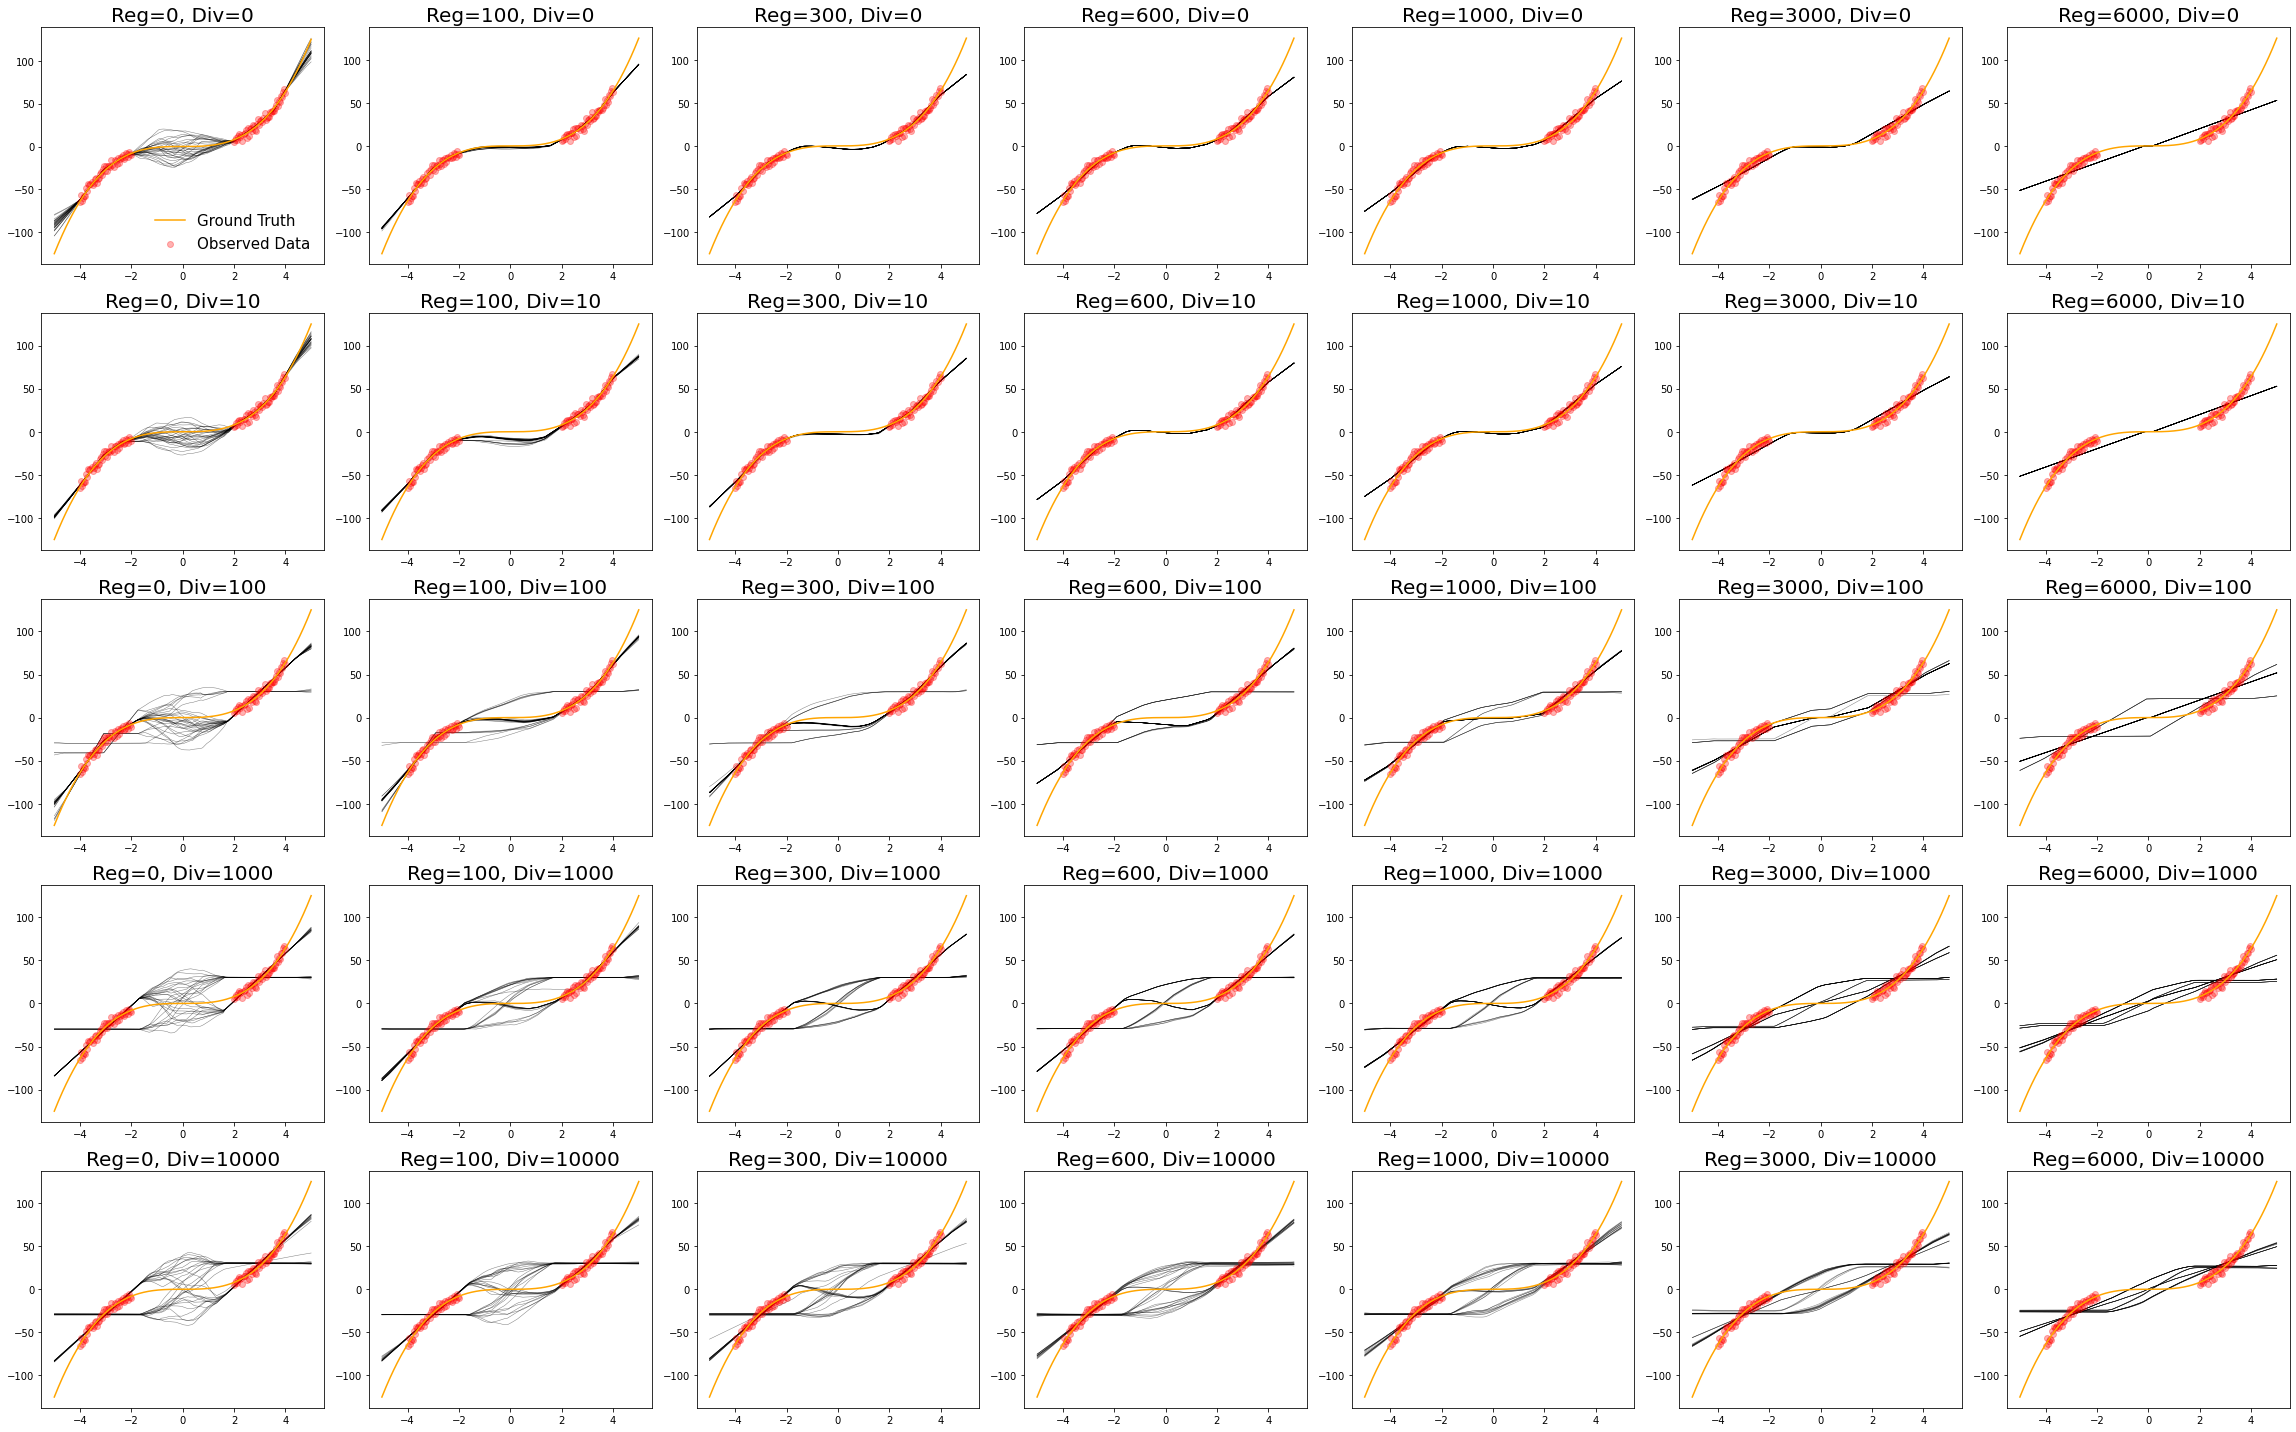

In [156]:
fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_pred = luna.forward(luna.weights, x_test)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], np.squeeze(y_pred).T, color='black', linewidth=0.5, alpha=0.5, zorder=0)
#     ax.set_title(f"Auxiliary Functions\n[Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize = 20)
    ax.set_title(f"Reg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize = 20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'aux_funcs_30_aux_5000_steps.png',dpi = 150)
plt.show()

## Plot prior samples

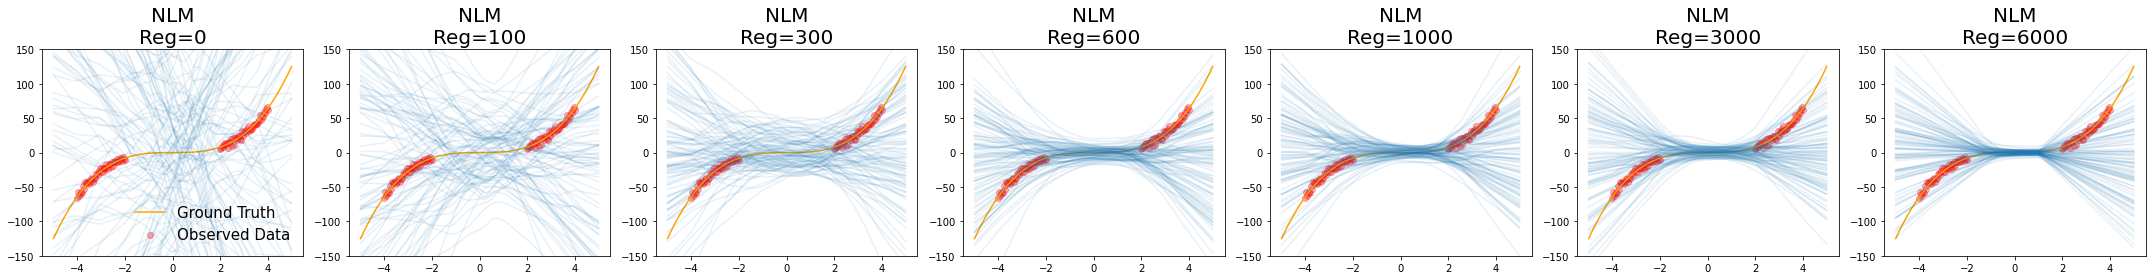

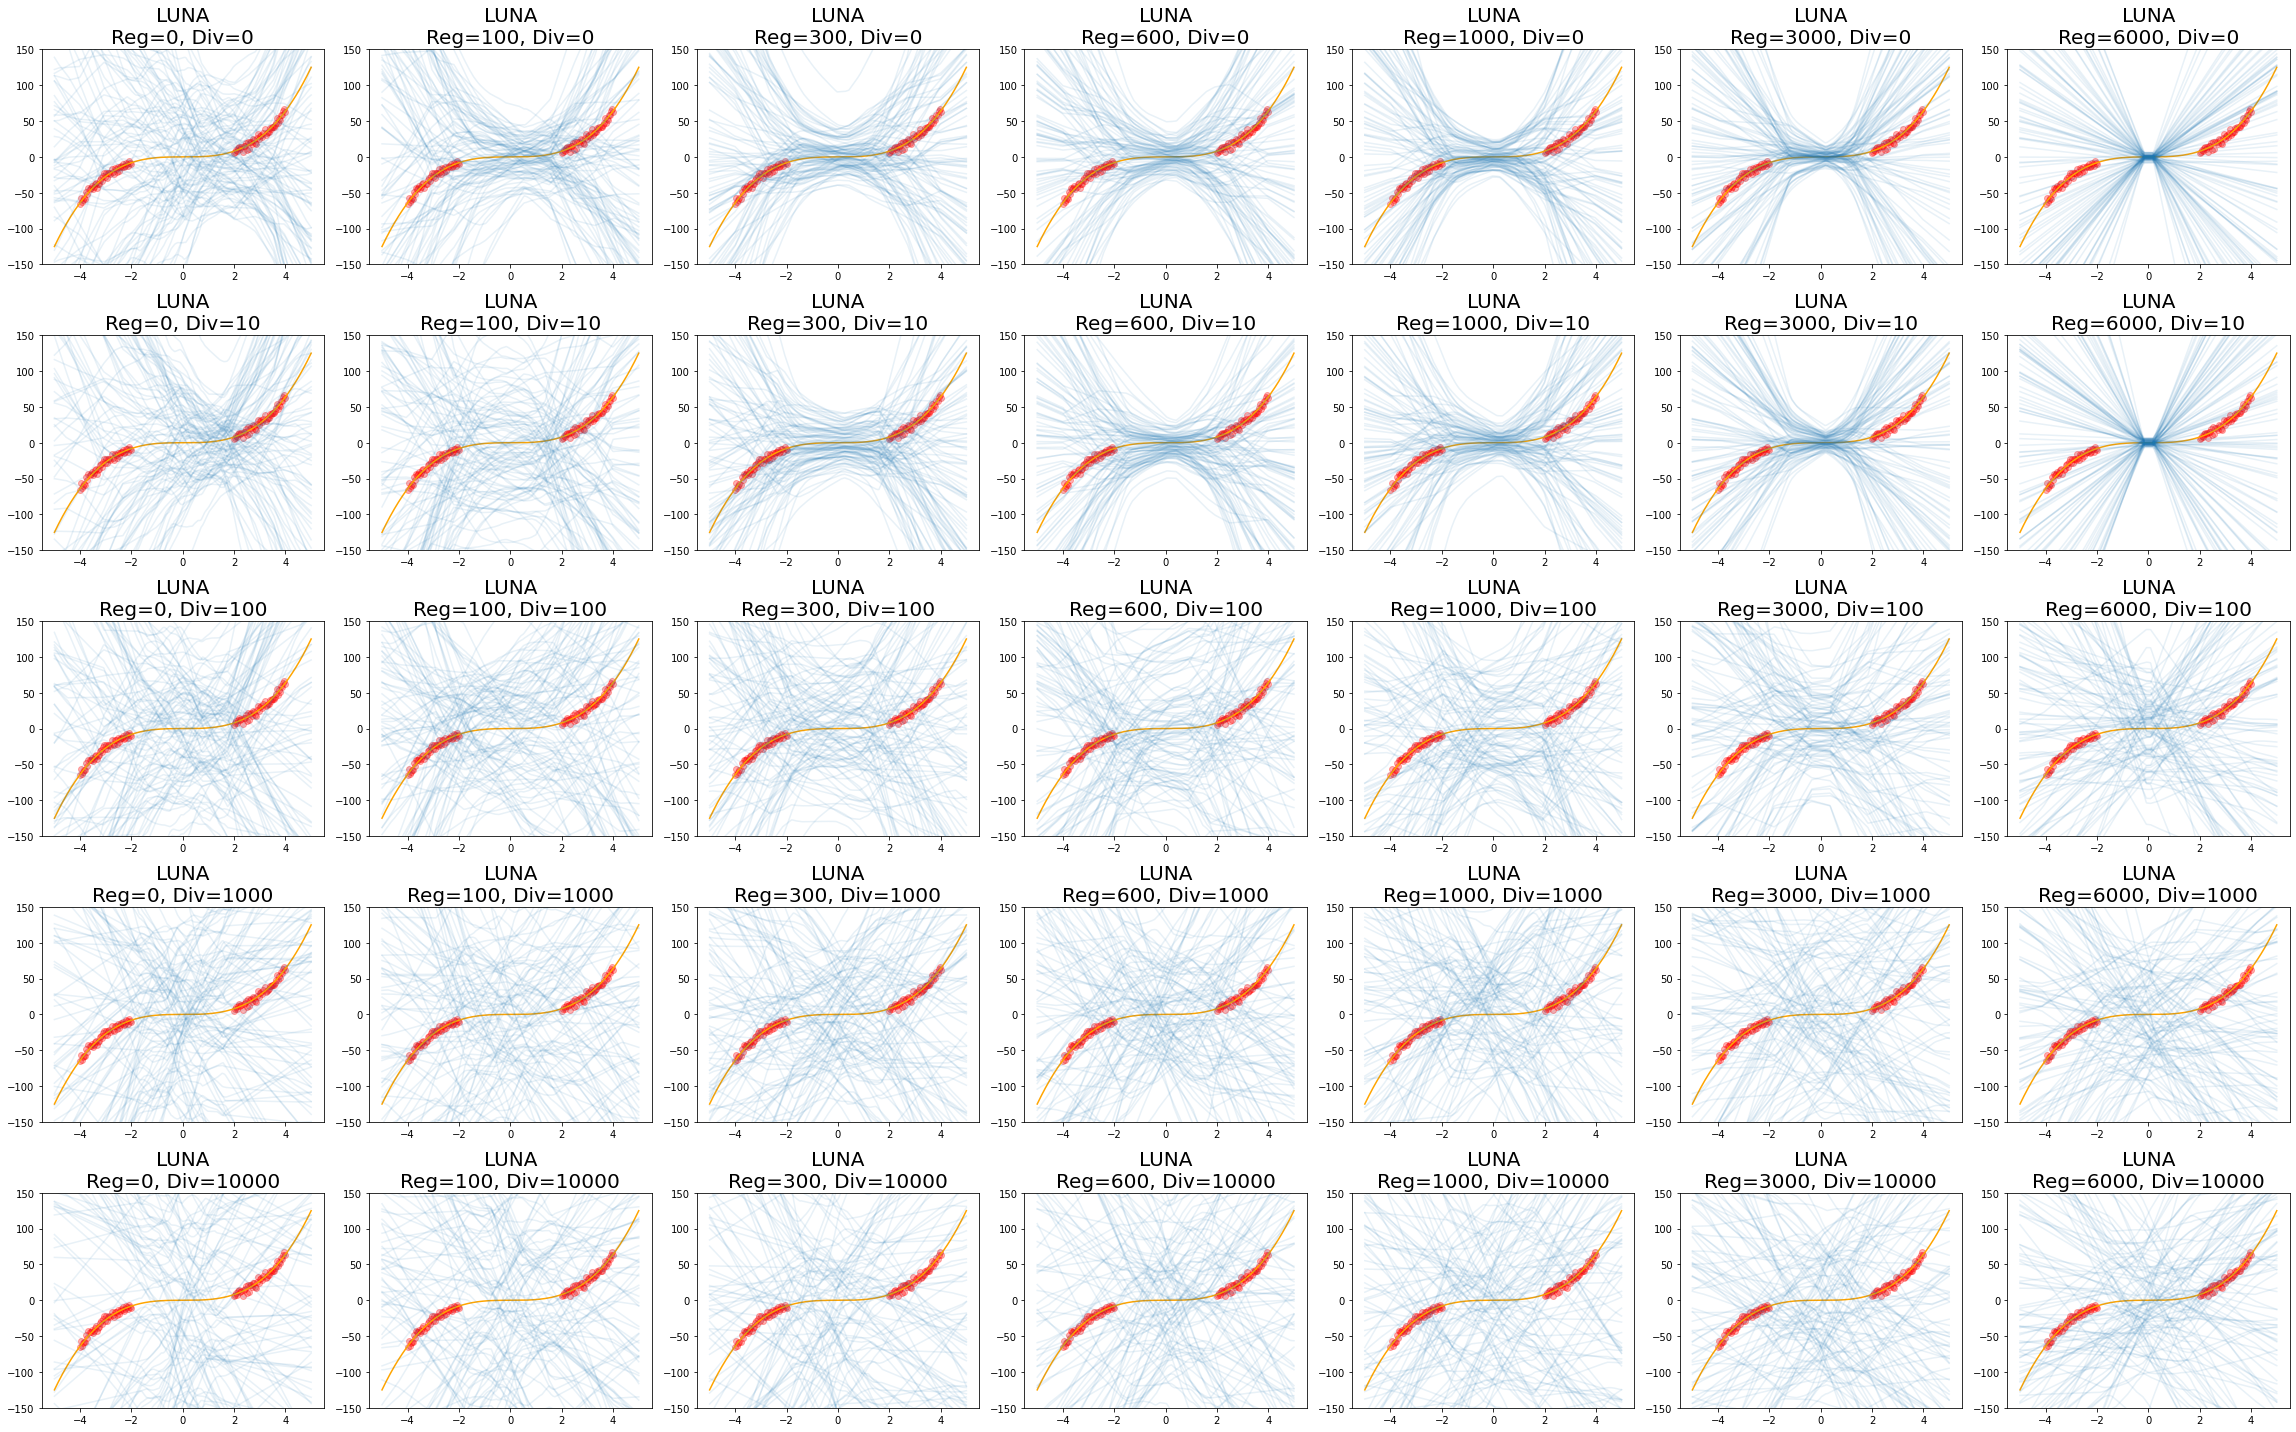

In [157]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize = 20)
    ax.set_ylim([-150, 150])
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'prior_samples_NLM_30_aux_5000_steps.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_prior = luna.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.savefig(imagePath+'prior_samples_LUNA_30_aux_5000_steps.png',dpi = 150)
plt.tight_layout()
plt.show()

## Plot posterior samples

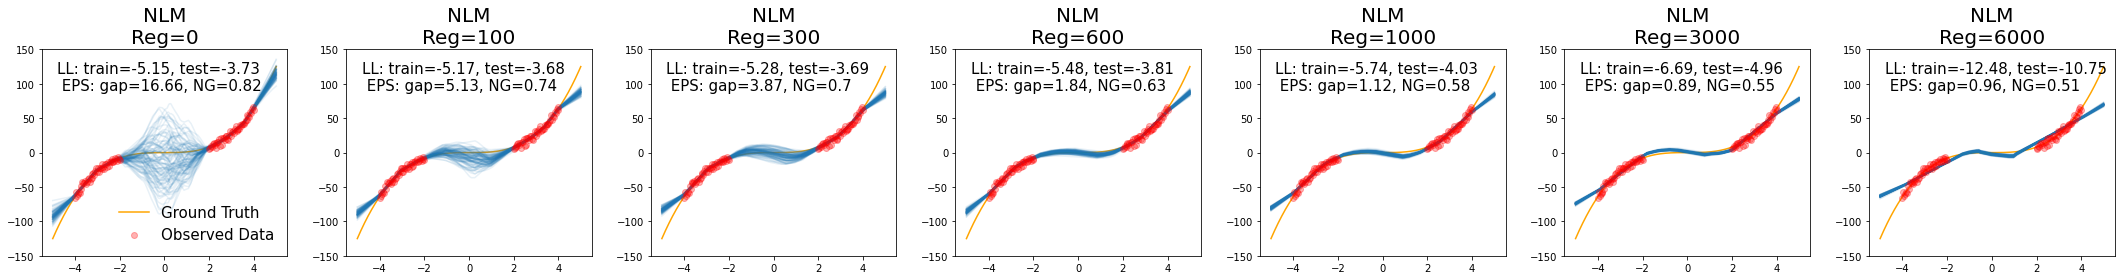

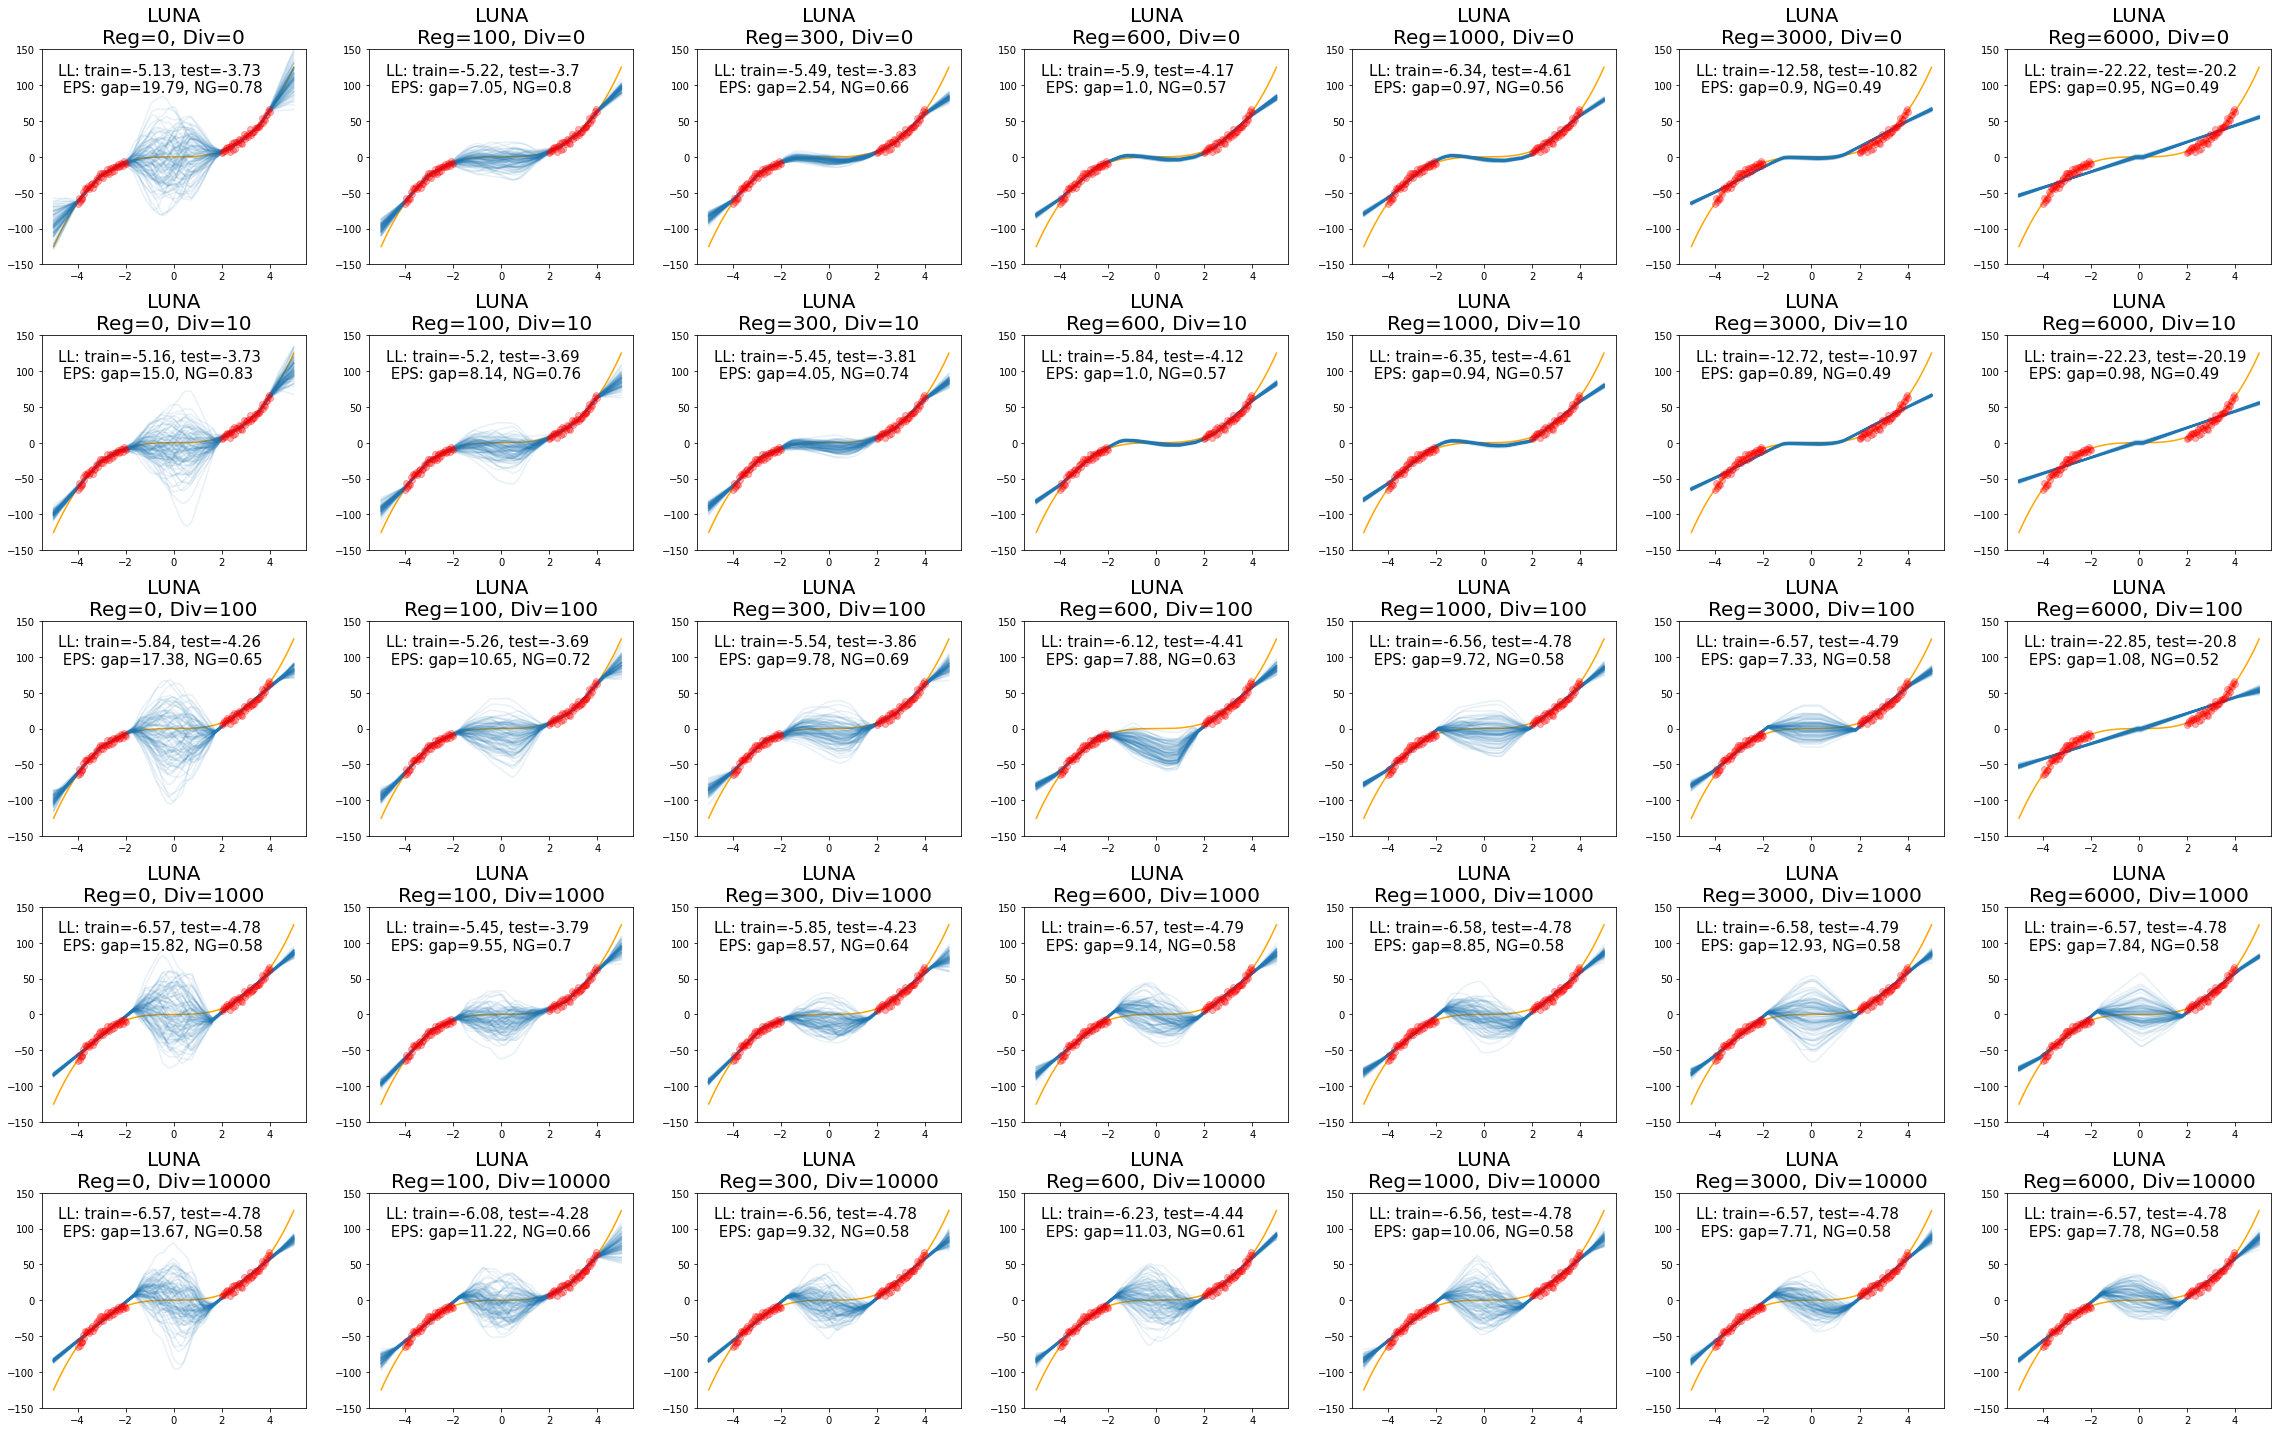

In [159]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
#     ax.set_title(f"NLM\nReg={reg_grid[i]}\nLL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}",fontsize=20)

    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_NLM_30_aux_5000_steps.png',dpi = 150)
plt.show()


nll_train_list_luna = []
nll_test_list_luna = []
eps_gap_list_luna = []
eps_non_gap_list_luna = []

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = luna.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = luna.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = luna.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_luna.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_luna.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     ax.set_title(f"LUNA\nReg={luna.params['reg_param']}, Div={luna.params['lambda_in']}\nLL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_LUNA_30_aux_5000_steps.png',dpi = 150)
plt.show()

## Plot posterior predictive intervals

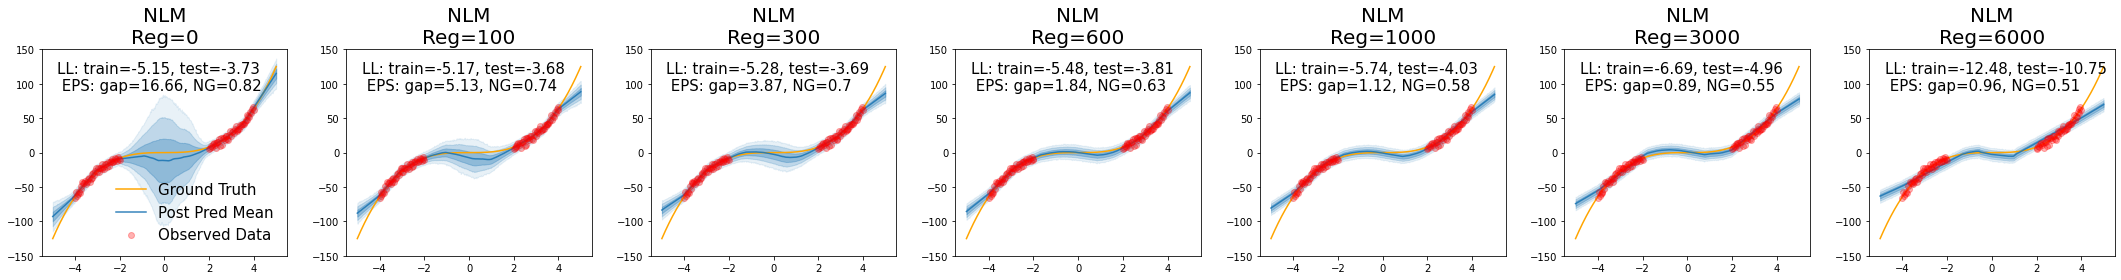

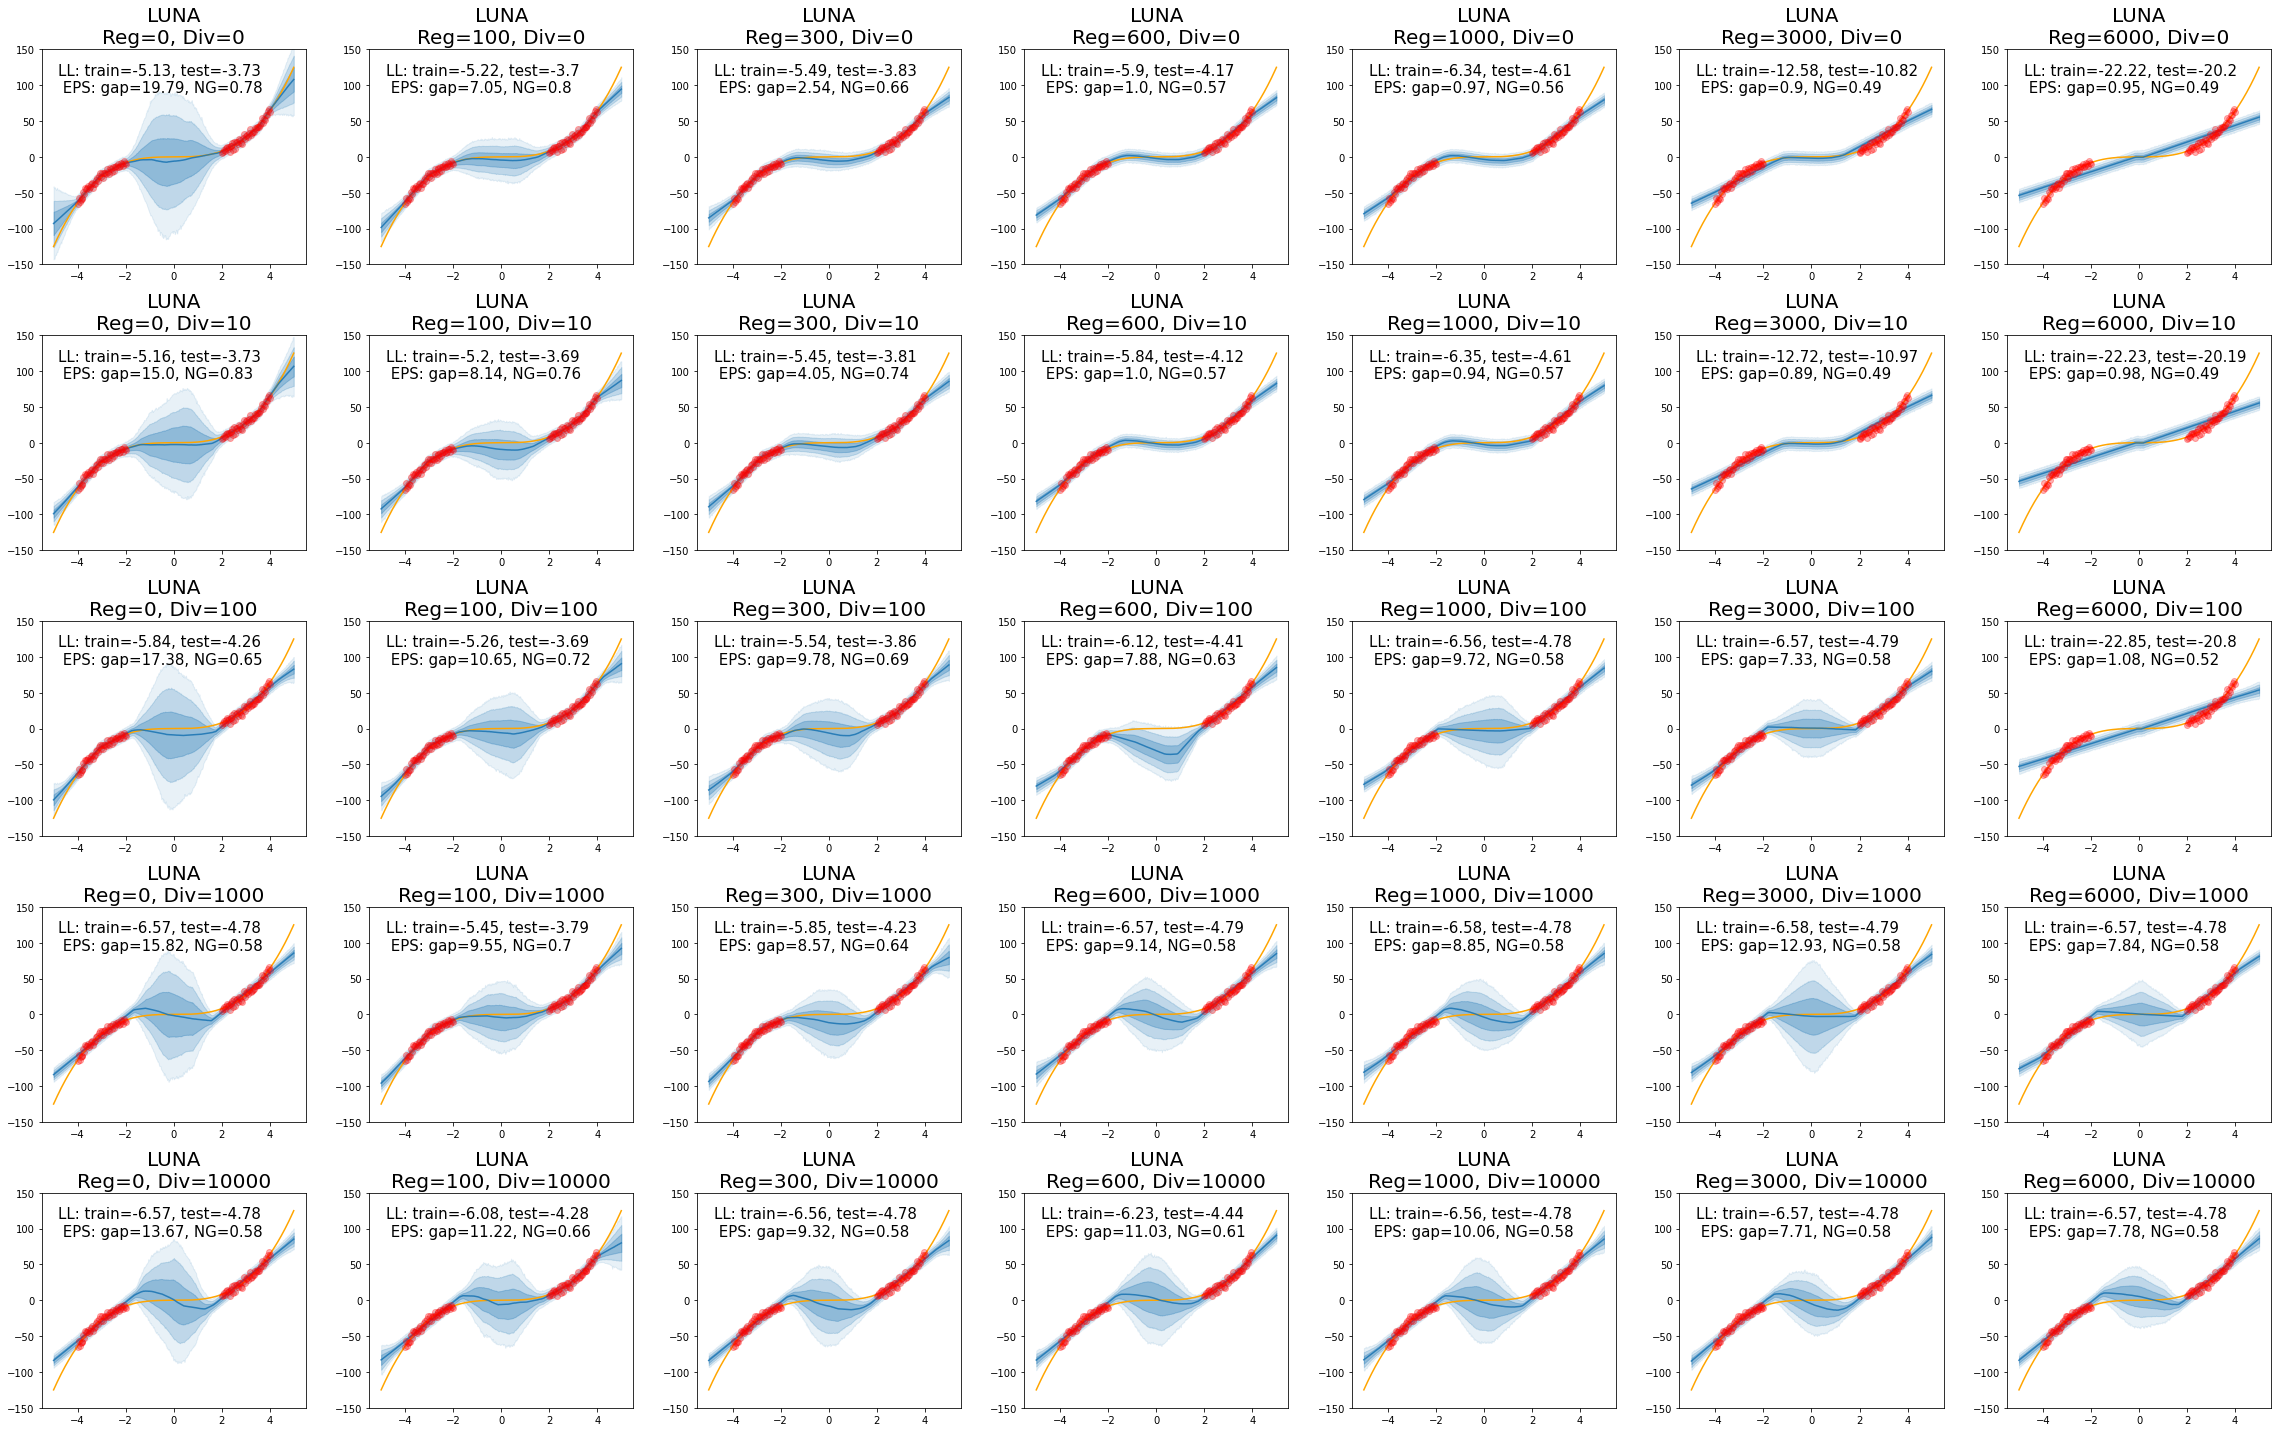

In [160]:
fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upp## Plot posterior predictive intervalser = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Post Pred Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)

#     ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=20)

#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'PPI_NLM_30_aux_5000_steps.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])  
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)

#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'PPI_LUNA_30_aux_5000_steps.png',dpi = 150)
plt.show()


## Evaluate model performance (log likelihood) and epistemic uncertainty

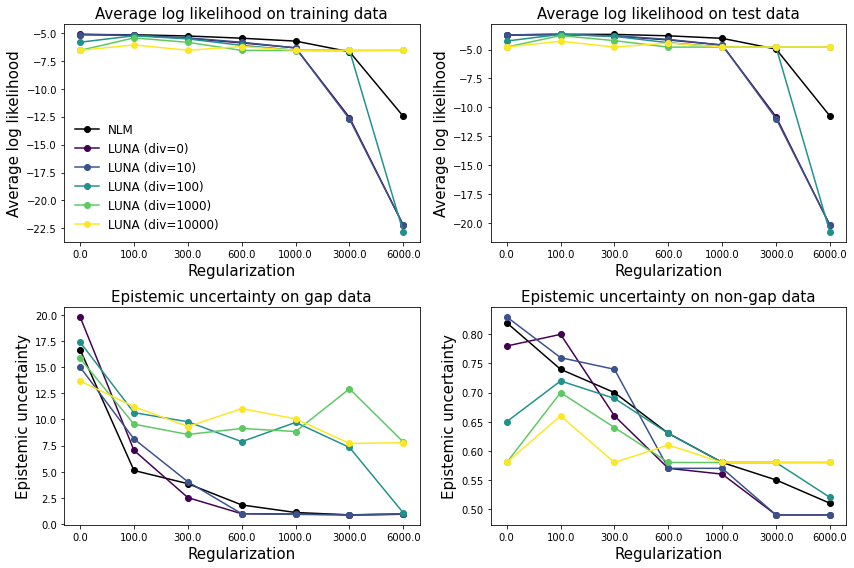

In [161]:
cmap = plt.get_cmap('viridis', len(div_grid))
fontsize = 15
fig, axes = plt.subplots(2,2,figsize = (12,8))
axes[0,0].plot(-np.array(nll_train_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,0].plot(-np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={int(div)})")
axes[0,0].set_xticks(range(len(reg_grid)))
axes[0,0].set_xticklabels(np.array(reg_grid))
axes[0,0].set_xlabel('Regularization',fontsize = fontsize)
axes[0,0].set_ylabe## Evaluate model performance (log likelihood) and epistemic uncertaintyl('Average log likelihood',fontsize = fontsize)
# axes[0,0].set_ylim([-23,-3])
axes[0,0].legend(frameon=False,fontsize = 12)
axes[0,0].set_title('Average log likelihood on training data',fontsize = fontsize)

axes[0,1].plot(-np.array(nll_test_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,1].plot(-np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[0,1].set_xticks(range(len(reg_grid)))
axes[0,1].set_xticklabels(np.array(reg_grid))
axes[0,1].set_xlabel('Regularization',fontsize = fontsize)
axes[0,1].set_ylabel('Average log likelihood',fontsize = fontsize)
# axes[0,1].set_ylim([-23,-3])
# axes[0,1].legend(frameon=False)
axes[0,1].set_title('Average log likelihood on test data',fontsize = fontsize)

axes[1,0].plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,0].plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,0].set_xticks(range(len(reg_grid)))
axes[1,0].set_xticklabels(np.array(reg_grid))
axes[1,0].set_xlabel('Regularization',fontsize = fontsize)
axes[1,0].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,0].set_ylim([0,22])
# axes[1,0].legend(frameon=False)
axes[1,0].set_title('Epistemic uncertainty on gap data',fontsize = fontsize)

axes[1,1].plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,1].plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,1].set_xticks(range(len(reg_grid)))
axes[1,1].set_xticklabels(np.array(reg_grid))
axes[1,1].set_xlabel('Regularization',fontsize = fontsize)
axes[1,1].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,1].set_ylim([0,22])
# axes[1,1].legend(frameon=False)
axes[1,1].set_title('Epistemic uncertainty on non-gap data',fontsize = fontsize)

plt.tight_layout()
plt.savefig(imagePath+'evaluation_30_aux_5000_steps.png',dpi = 150)
plt.show()

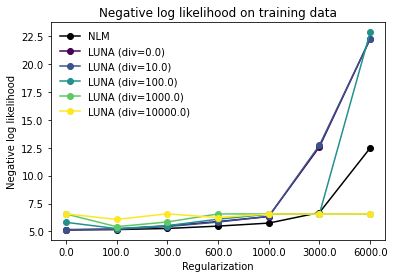

In [140]:
cmap = plt.get_cmap('viridis', len(div_grid))
plt.plot(nll_train_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on training data')
plt.show()

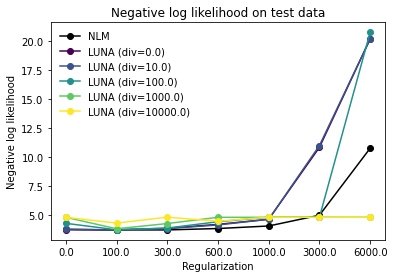

In [42]:
plt.plot(nll_test_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on test data')
plt.show()

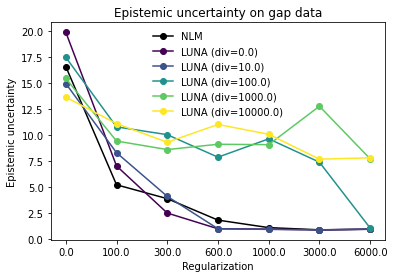

In [43]:
plt.plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on gap data')
plt.show()

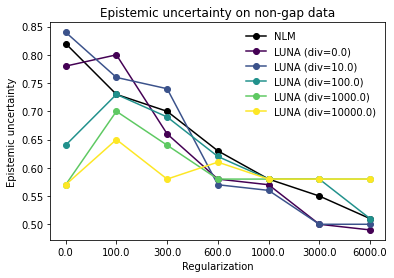

In [44]:
plt.plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on non-gap data')
plt.show()